In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# dadt = -a + alpha/(1+C^n)
# dbdt = -b + alpha(1+A^n)
# dcdt = -c + alpha/(1+B^n) + kSi/(1+Si)
# dAdt = beta(a-A)
# dBdt = beta(b-B)
# dCdt = beta(c-C)
# dSidt = -k0*Si + k1*A - eta(Si-Se)

In [36]:
# individual cell, no autoinducer
def repressilator(state, t):
    
    a, b, c, A, B, C= state
    
    # mRNA
    dadt = -a + alpha/(1+C**n)
    dbdt = -b + alpha/(1+A**n)
    dcdt = -c + alpha/(1+B**n)
    
    # protein
    dAdt = beta*(a-A)
    dBdt = beta*(b-B)
    dCdt = beta*(c-C)
    
    return dadt, dbdt, dcdt, dAdt, dBdt, dCdt

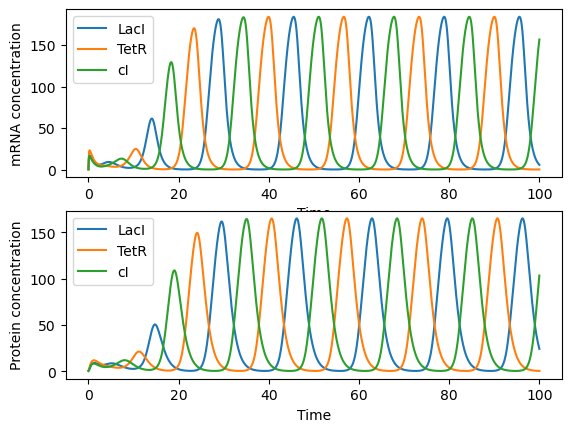

In [37]:
alpha = 216
beta = 1
kappa = 20
eta = 10
k0 = 1
k1 = 0.01
ke = 1/6
kd = 1
n = 2
Se = 0.2

state0 = [0.2, 0.1, 0.3, 0.1, 0.4, 0.5]
t = np.linspace(0, 100, 10000)

state = odeint(repressilator, state0, t)

plt.subplot(2, 1, 1)
plt.plot(t, state[:,0])
plt.plot(t, state[:,1])
plt.plot(t, state[:,2])
plt.xlabel('Time')
plt.ylabel('mRNA concentration')
plt.legend(('LacI', 'TetR', 'cI'))

plt.subplot(2, 1, 2)
plt.plot(t, state[:,3])
plt.plot(t, state[:,4])
plt.plot(t, state[:,5])
plt.xlabel('Time')
plt.ylabel('Protein concentration')
plt.legend(('LacI', 'TetR', 'cI'))

In [31]:
# multicellular
def repressilator_multicell(state, t):
    
    a, b, c, A, B, C, Si = state
    
    # mRNA
    dadt = -a + alpha/(1+C**n)
    dbdt = -b + alpha/(1+A**n)
    dcdt = -c + alpha/(1+B**n) + kappa*Si/(1+Si)
    
    # protein
    dAdt = beta*(a-A)
    dBdt = beta*(b-B)
    dCdt = beta*(c-C)
    
    # autoinducer
    dSidt = -k0*Si + k1*A - eta*(Si-Se) # internal concentration
    
    return dadt, dbdt, dcdt, dAdt, dBdt, dCdt, dSidt

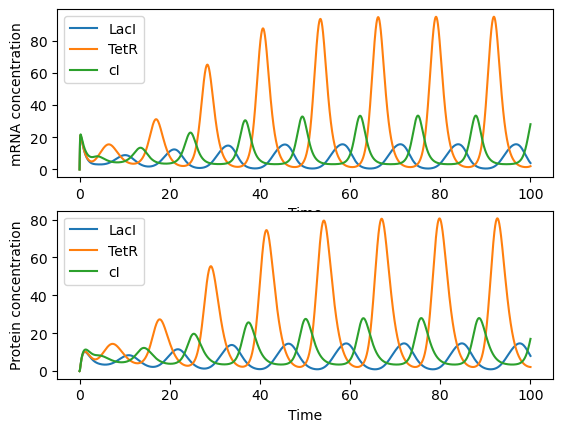

In [39]:
alpha = 216
beta = 1
kappa = 20
eta = 10
k0 = 1
k1 = 0.01
ke = 1/6
kd = 1
n = 2
Se = 0.2

state0 = [0, 0, 0, 0, 0, 0, 0.1]
t = np.linspace(0, 100, 10000)

state = odeint(repressilator_multicell, state0, t)

plt.subplot(2, 1, 1)
plt.plot(t, state[:,0])
plt.plot(t, state[:,1])
plt.plot(t, state[:,2])
plt.xlabel('Time')
plt.ylabel('mRNA concentration')
plt.legend(('LacI', 'TetR', 'cI'))

plt.subplot(2, 1, 2)
plt.plot(t, state[:,3])
plt.plot(t, state[:,4])
plt.plot(t, state[:,5])
plt.xlabel('Time')
plt.ylabel('Protein concentration')
plt.legend(('LacI', 'TetR', 'cI'))